In [23]:
import os
from pathlib import Path
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

plt.rcParams['font.size'] = '20'

In [25]:
DATA_PATH = Path.cwd().parent.parent / "data" / "raw"
df = pd.read_csv(DATA_PATH / "recipes.csv", index_col=0)

In [21]:
df

,title,preparation_time,cooking_time,total_time,style,type,servings,ingredients,instructions
0,Beetroot Dhal,,0,60,Indian and Indian Subcontinent,NaN,2-4,"['2 beetroot, chopped into small cubes ', 'Dri...",['Preheat your oven to 180°C/350°F/Gas Mark 4....
1,Avocado Wings with Ranch Dip,,0,20,NaN,NaN,4,"['500ml high-quality soy milk', '42g lemon jui...",['Combine all the ingredients (except the oil)...
2,Black Forest Gateau Smoothie,,0,5 minutes,NaN,NaN,2,"['160g/1 cup frozen berries of your choice', '...",['Blend all ingredients until smooth.']
3,Super-fast Healthy Ice Cream,,0,5-7 minutes,NaN,NaN,4-6,"['90g/⅔ cup raw, unsalted Brazil nuts', '8-9 f...","['Blend the Brazil nuts, dates, water, and van..."
4,5:2 Fast Day – Spiced Tomato Dahl,,0,40 minutes,Indian and Indian Subcontinent,NaN,1,"['2 squirts oil spray (2 cals)', '80g red onio...",[]
...,...,...,...,...,...,...,...,...,...
688,Sweet Potato Gnocchi with Sage Cashew Sauce,,0,0,Italian,NaN,unknown,"['500g sweet potatoes', '130g grade 00 flour o...",['Bake the sweet potatoes in their skins until...
689,"Chilli Hotpot with Black Beans, Lentils & Choc...",,0,40 minutes,"Mexican, Central and South American",NaN,4-6,"['1 onion, finely diced', '3 cloves garlic, fi...","['Fry the onion until soft.', 'Add the garlic ..."
690,Banana Cardamom & Coconut Biscuits,,0,20,NaN,NaN,24,"['125g dark rye flour ', '150g jumbo porridge ...",['Preheat your oven to 180ºC/350ºF/Gas Mark 4....
691,Martin Shaw’s Shepherdess Pie,,0,45 minutes,NaN,NaN,4-6,['Cooked potatoes for mashing plus olive oil o...,['Pre-heat the oven to 375ºF/190ºC/Gas Mark 5....


## Preprocess dataframe

In [26]:
for col in ['preparation_time', 'cooking_time', 'total_time']:
    #df[col] = df[col].fillna(0)
    df[col] = df[col].astype(str)
    df[col] = df[col].str.extract('(\d+)', expand=False)
    #df[col] = df[col].fillna(0)
    df[col] = df[col].astype(float)
    #df[df[col] == 0, col] = np.nan

In [92]:
unwanted_words = ['tsp', 'small', 'g', 'knob', 'cloves', 'clove', 'cups', 'cup', 'ml', 'gram', 'large', 'pinch', 'tbsp', 
                  'sliced', 'chopped', 'finely', 'handful', 'diced', 'crushed', 'taste', 'roughly', 'grated', 'peeled', 
                  'rinsed', 'drained', 'extra', 'virgin', 'oz', 'medium', 'ground', 'eg pure', 'eg']

In [93]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

corpus = []
for ingredient_list in df['ingredients'].to_list():
    ingredients = ingredient_list.split(',')
    for ingredient in ingredients:
        #print(ingredient)
        
        ingredient = re.sub('[^a-zA-Z]', ' ', ingredient)
        ingredient = ingredient.lower()              #put to lower case
        ingredient = ingredient.split()              #split the words
        all_stopwords = stopwords.words('english')
        all_stopwords.extend(unwanted_words)
        ingredient = [word for word in ingredient if not word in set(all_stopwords)]
        #print(ingredient)
        final_ingredient = ''
        for item in ingredient:
            final_ingredient += item + ' '
        corpus.append(final_ingredient[:-1])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxlu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
print(corpus)

['beetroot', 'cubes', 'drizzle olive oil', 'olive oil', 'black mustard seeds', 'turmeric', 'cumin seeds', 'coriander', 'chilli flakes', 'onion', '', 'ginger', '', 'garlic', '', 'beetroot', '', 'red lentils', '', 'water', 'coconut cream plain vegan yoghurt', 'sea salt', 'black pepper', 'garam masala', 'creaminess add coconut yogurt cream', 'fresh coriander', 'chilli flakes', 'flour', 'sieved', 'sea salt', 'splash olive oil', 'apple cider vinegar', 'water', 'high quality soy milk', 'lemon juice', 'spirit vinegar', 'fresh dill', 'sugar', 'garlic powder', 'onion powder', 'nutritional yeast', 'salt', 'sunflower oil', 'firm avocados', 'de stoned', 'litre vegetable oil frying', 'flour', 'soda water', 'smoked paprika', 'salt', 'frozen berries choice', 'ripe banana', 'nut butter choice optional', 'raw cacao powder', 'medjool dates', 'stones removed', 'plant milk choice', 'switch half berries half frozen peas', 'turmeric black pepper', 'lump frozen spinach', 'cm cube fresh beetroot', 'sprig broc

In [95]:
df_ingredients = pd.DataFrame(corpus)

In [97]:
df_ingredients.value_counts()

                             903
garlic                       251
salt                         215
olive oil                    141
onion                        108
                            ... 
inches ginger                  1
inch square root turmeric      1
inch ginger                    1
inch cm cucumber               1
zested juiced                  1
Length: 5460, dtype: int64

## EDA

### 1. Cooking styles and types

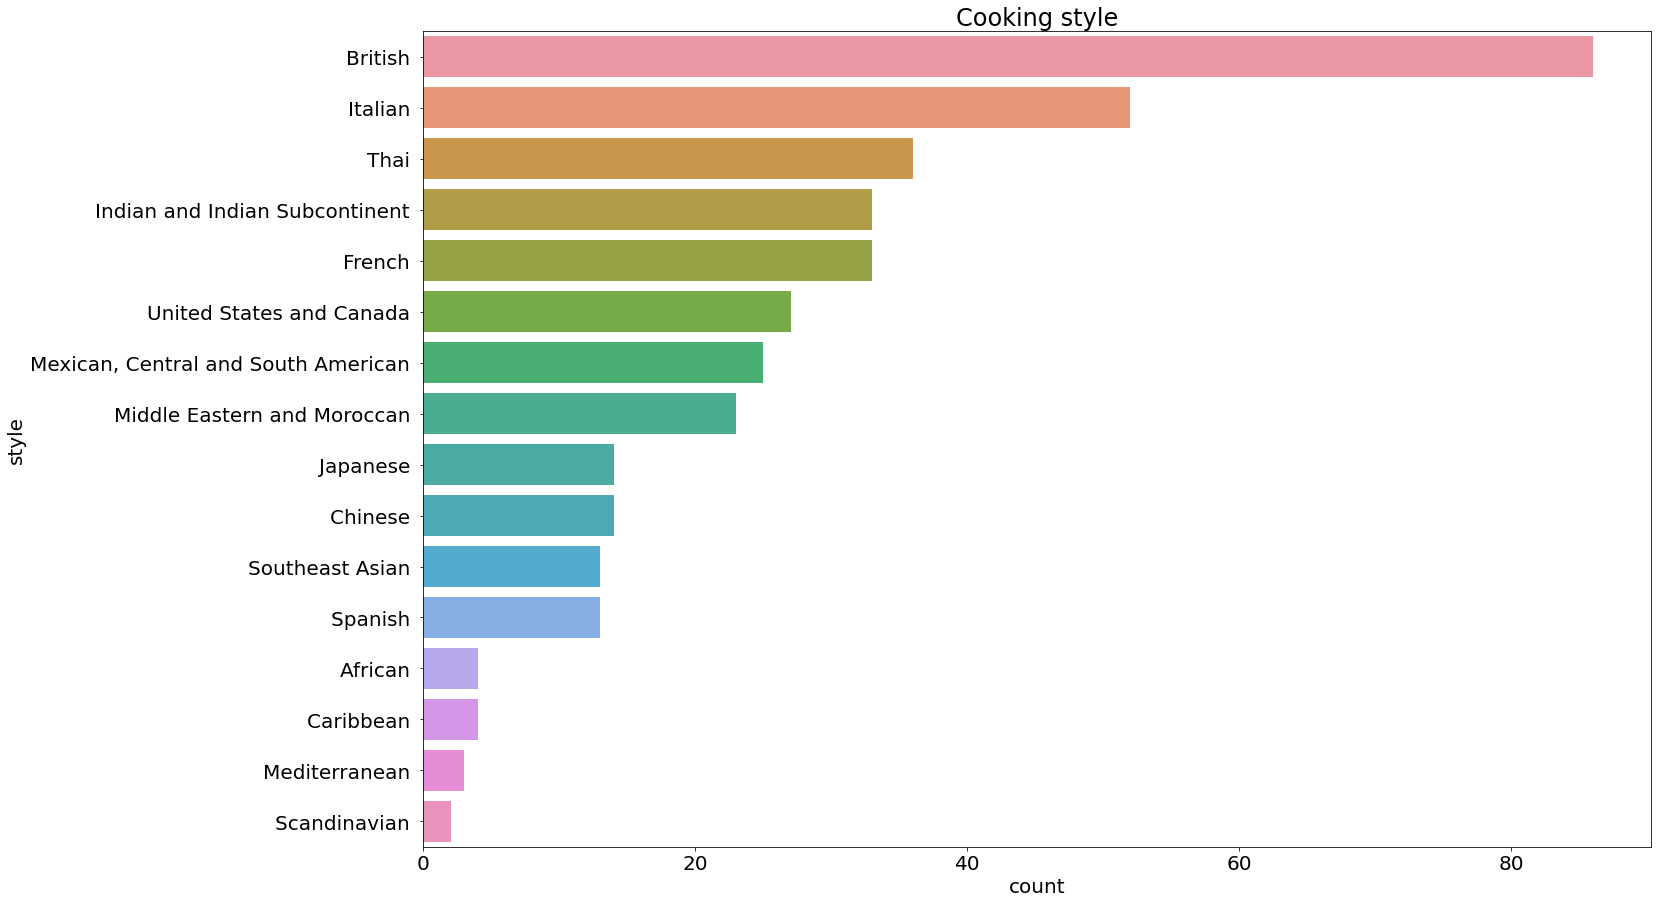

In [40]:
order = df['style'].value_counts().index.to_list()

fig, ax = plt.subplots(1,1, figsize=(22,15))
sns.countplot(y="style", data=df, ax=ax, order=order)
ax.set_title('Cooking style');

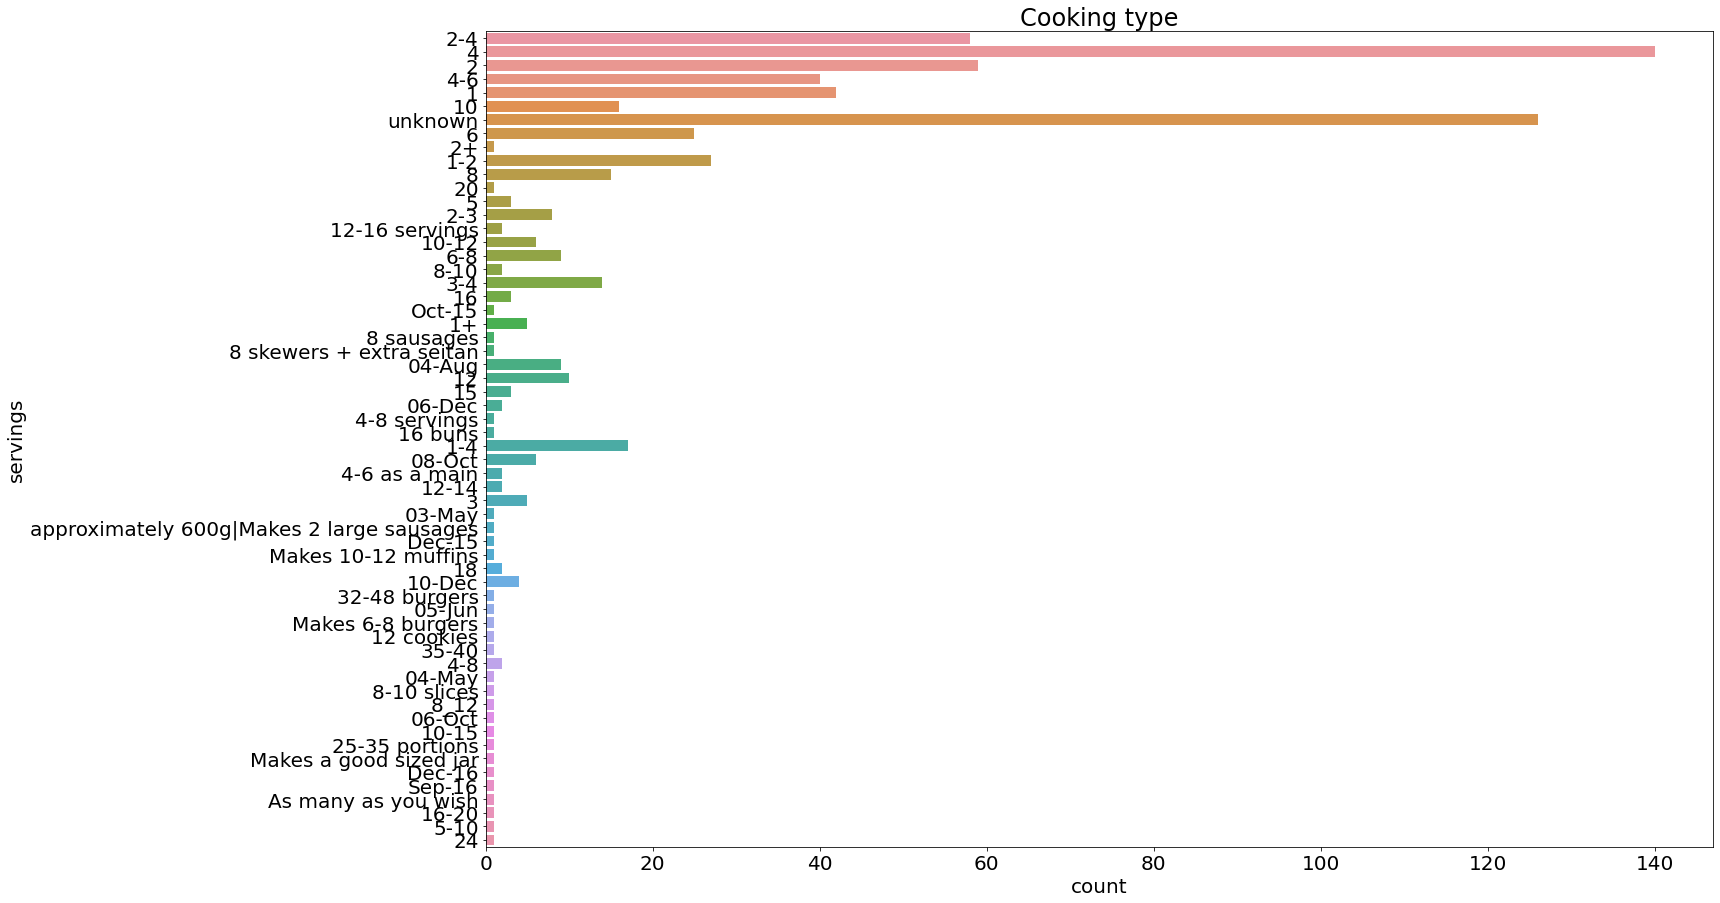

In [35]:
fig, ax = plt.subplots(1,1, figsize=(22,15))
sns.countplot(y="servings", data=df, ax=ax)
ax.set_title('Cooking type');